In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## Loading Data

In [2]:
try:
    data = pd.read_csv("Iris-Dataset.csv")
    inputs = np.array(data.drop("y",axis=1))
    targets = np.array(data["y"])
    targets = np.array([{j:i for i,j in enumerate(data["y"].unique())}[k] for k in targets])
except:
    data = load_iris()
    inputs = data.data
    targets = data.target

## Train Test Split

In [3]:
x_train,x_test=np.zeros((120,4)),np.zeros((30,4))
y_train,y_test=np.zeros((120,)),np.zeros((30,))

for i,j in zip(range(0,150,50),range(0,120,40)):
    x_train[j:j+40] = inputs[i:i+40]
    y_train[j:j+40] = targets[i:i+40]
    
for i,j in zip(range(40,150,50),range(0,30,10)):
    x_test[j:j+10] = inputs[i:i+10]
    y_test[j:j+10] = targets[i:i+10]

## Calculating Clusters

In [4]:
c_0 = np.array([x_train[0:40,i].mean() for i in range(len(x_train[0,:]))])
c_1 = np.array([x_train[40:80,i].mean() for i in range(len(x_train[0,:]))])
c_2 = np.array([x_train[80:120,i].mean() for i in range(len(x_train[0,:]))])

## Predictions

In [5]:
coddist = lambda a,b: np.sqrt(np.sum((a-b)**2)).round(3)

In [6]:
y_test_preds = []
for s in x_test:
    d = [coddist(s,i) for i in [c_0,c_1,c_2]]
    y_test_preds.append(d.index(min(d)))

## Accuracy Metric

In [7]:
f"Accuracy : {((sum(y_test==y_test_preds)/len(y_test))*100).round(2)} %"

'Accuracy : 96.67 %'

In [9]:
sum(y_test == np.array(y_test_preds).tolist())

29

## Just a Cherry on the Top!

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

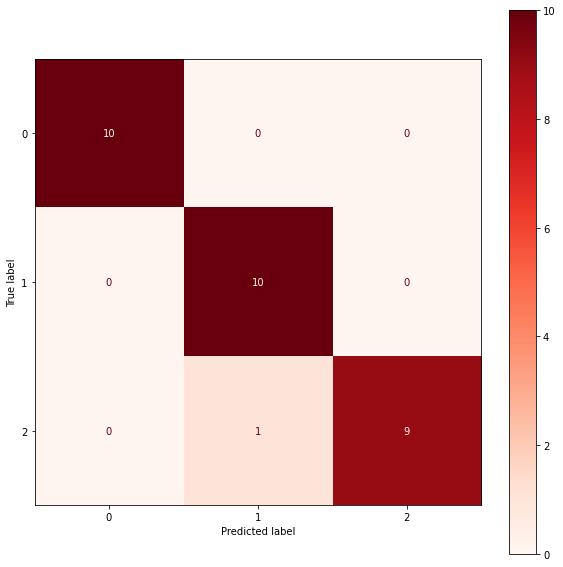

In [11]:
conf = ConfusionMatrixDisplay.from_predictions(y_test,y_test_preds,
                                               labels=[0,1,2],
                                               cmap="Reds")

fig = conf.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10) 

In [12]:
print(classification_report(y_test,y_test_preds,
                            target_names=["0","1","2"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

